## Load Data

In [317]:
import pandas as pd
import numpy as np

FILENAME = "risultati.xlsx"
df = pd.read_excel(f"../experiment_data/{FILENAME}")
df.head(2)

,Informazioni cronologiche,"What is your current status? (e.g., Bachelor student, Master student, PhD student, Professional developer, Other)","What is your current field of study or work? e.g., Computer Science, Software Engineering, Data Science, Other)",How many years of experience do you have with programming?,"Have you ever used AI-based tools (e.g., GitHub Copilot, ChatGPT) to support your programming tasks?","Have you ever integrated Generative AI tools (e.g., GitHub Copilot, ChatGPT plugins, Cursor...) into your development environment (IDE)?",TAM_PU_1: Using the assistant would improve my efficiency in programming tasks.,TAM_PU_2: Using the assistant could enhance my efficiency in completing programming tasks,TAM_PU_3: Using the assistant would increase my productivity,"TAM_PU_4: I find the idea of having answers adapted to my profile (e.g., experience level, preferred tone) useful",...,TOM_2: I felt that TARS was adapting to the way I think,"TOM_3: TARS provided explanations that reflected the information I gave at the beginning (e.g., my experience level, goals, and preferences).",TOM_4: I would say that TARS successfully built a mental model of me as a user.,"TOM_5: The tone used by TARS matched my selected preference (e.g., friendly, professional, neutral)","TOM_6: The explanations aligned with my main goals (e.g., learning, productivity, understand code...)","TOM_7: TARS respected my preferred explanation style (e.g., short/direct or detailed/technical).","TOM_8: Overall, I felt that TARS adapted its behavior to suit me as an individual user","TOM_9: Compared to other tools, TARS felt more tailored to my needs",Provide your general feedback about the tool,What functionality of the tool would you change and why
0,2025-07-22 10:50:24.072,Master student,Software Engineering,4-5,Always (nearly every working hour),Yes,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Partially Agree,Strongly Agree,Partially Disagree,Il tool risulta ben integrato all'interno di V...,"Probabilmente, per quanto riguarda la code und..."
1,2025-07-22 11:06:02.653,Bachelor student,Computer Science,6 or more years,Frequently (daily),No,Partially Agree,Strongly Agree,Partially Agree,Partially Agree,...,Neutral,Strongly Agree,Partially Agree,Strongly Agree,Strongly Agree,Strongly Agree,Partially Agree,Neutral,"Il tool l'ho trovato semplice da utilizzare, n...",Cambiere visivamente forse il setting degli at...


In [318]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

## Clean DataFrame

In [319]:
#df[df.isna().any(axis=1)]

In [320]:
to_drop_cols = ["Informazioni cronologiche"]
df = df.drop(to_drop_cols, axis=1)

In [321]:
mapper = {
    "What is your current status? (e.g., Bachelor student, Master student, PhD student, Professional developer, Other)": "Current Status",
    "What is your current field of study or work? e.g., Computer Science, Software Engineering, Data Science, Other)": "Field of study",
    "How many years of experience do you have with programming?": "Years of Experience",
    "Have you ever used AI-based tools (e.g., GitHub Copilot, ChatGPT) to support your programming tasks?": "Frequency For AI Tools",
    "Have you ever integrated Generative AI tools (e.g., GitHub Copilot, ChatGPT plugins, Cursor...) into your development environment (IDE)?": "AI Tools in IDE",
    "TAM_PU_1: Using the assistant would improve my efficiency in programming tasks.": "TAM_PU_1",
    "TAM_PU_2: Using the assistant could enhance my efficiency in completing programming tasks": "TAM_PU_2",
    "TAM_PU_3: Using the assistant would increase my productivity": "TAM_PU_3",
    "TAM_PU_4: I find the idea of having answers adapted to my profile (e.g., experience level, preferred tone) useful": "TAM_PU_4",
    "TAM_PE_1: Interacting with the assistant was simple and intuitive": "TAM_PE_1",
    "TAM_PE_2: I had no difficulty understanding how to use the assistant": "TAM_PE_2",
    "TAM_PE_3: I find the tool easy to use": "TAM_PE_3",
    "TAM_PE_4: Was the installation and configuration of the extension easy? ": "TAM_PE_4",
    "TAM_BI_1: As a developer, if I had to work on a file I didn’t write, I would use the TARS tool to understand it first": "TAM_BI_1",
    "TAM_ATU_1: I believe using TARS is generally a good idea": "TAM_ATU_1",
    'TAM_ATU_2: I think integrating Generative AI tools into an IDE is a good idea': 'TAM_ATU_2',
    'TAM_ATU_3: I believe TARS could be a more suitable choice than copy-pasting code in ChatGPT': 'TAM_ATU_3',
    'TLX_MD_1: How mentally demanding did you find this task? (0 = Not at all, 10 = Extremely demanding)': 'TLX_MD_1',
    'TLX_MD_2: Did TARS’s explanations reduce or increase your mental effort while understanding the code? (0 = Greatly reduced effort, 10 = Greatly increased effort)': 'TLX_MD_2',
    'TLX_MD_3: Did you find it mentally exhausting to follow TARS’s reasoning? (0 = Not at all exhausting, 10 = Extremely exhausting)': 'TLX_MD_3',
    'TLX_PD_1: Did you have to perform many manual actions (clicks, scrolling, interactions) to get useful explanations from TARS? (0 = Not at all, 10 = Many actions required)': 'TLX_PD_1',
    'TLX_P_1: How well do you think you understood the code thanks to TARS? (0 = Not at all, 10 = Completely understood)': 'TLX_P_1',
    'TLX_E_1: How much overall effort did you have to put into understanding the code using TARS? (0 = No effort at all, 10 = Extreme effort)': 'TLX_E_1',
    'TLX_E_2: Did using TARS make your task more or less effortful compared to doing it manually? (0 = Much less effortful, 10 = Much more effortful)': 'TLX_E_2',
    'TLX_E_3: Did you have to struggle to interpret or adapt the explanations generated by TARS? (0 = Not at all, 10 = A lot)': 'TLX_E_3',
    'TLX_F_1: Did you feel frustration due to errors, delays, or unexpected behavior from the tool? (0 = Not at all, 10 = Extremely frustrated)': 'TLX_F_1',
    'TLX_F_2: How frustrated, stressed, or discouraged did you feel during the manual version of the task? (0 = Not at all, 10 = Extremely)': 'TLX_F_2',
    'TLX_F_3: How frustrated, stressed, or discouraged did you feel during the TARS-supported version of the task? (0 = Not at all, 10 = Extremely)': 'TLX_F_3',
    'FB_1: Did you find the assistant interface visually appealing?': 'FB_1',
    'FB_2: Did the way the explanations were designed distract you during the task?': 'FB_2',
    'FB_3: Looking back on the experience, which version of the task did you prefer (The manual one or the TARS one)?': 'FB_3',
    'TOM_1: TARS adapted the explanations to my level of programming experience': 'TOM_1',
    'TOM_2: I felt that TARS was adapting to the way I think': 'TOM_2',
    'TOM_3: TARS provided explanations that reflected the information I gave at the beginning (e.g., my experience level, goals, and preferences).': 'TOM_3',
    'TOM_4: I would say that TARS successfully built a mental model of me as a user.': 'TOM_4',
    'TOM_5: The tone used by TARS matched my selected preference (e.g., friendly, professional, neutral)': 'TOM_5',
    'TOM_6: The explanations aligned with my main goals (e.g., learning, productivity, understand code...)': 'TOM_6',
    'TOM_7: TARS respected my preferred explanation style (e.g., short/direct or detailed/technical).': 'TOM_7',
    'TOM_8: Overall, I felt that TARS adapted its behavior to suit me as an individual user': 'TOM_8',
    'TOM_9: Compared to other tools, TARS felt more tailored to my needs': 'TOM_9',
    'Provide your general feedback about the tool': 'General feedback about the tool',
    'What functionality of the tool would you change and why': 'What functionality of the tool would you change and why'
}

reverse_column_mapper = {v: k for k,v in mapper.items()}

df = df.rename(columns=mapper)

## RQ2: Come viene percepito TARS dagli utenti in termini di utilità, facilità d’uso e carico cognitivo?


### Ipotesi nulla (H₀)
Gli utenti non percepiscono differenze significative rispetto al valore neutro della scala (es. 3 su 0–5, oppure 5 su 0–10) nei punteggi di:

- **TAM**  
  - **Utilità (PU)**: μ > μ₀ → TARS è percepito come utile.  
  - **Facilità d’uso (PE)**: μ > μ₀ → TARS è percepito come facile da usare.  
  - **Attitudine (ATU)**: μ > μ₀ → gli utenti hanno un atteggiamento positivo verso l’uso di TARS.  
  - **Intenzione d’uso (BI)**: μ > μ₀ → gli utenti mostrano una maggiore intenzione a usare TARS.  

- **NASA-TLX**  
  - **Mental Demand (MD)**: μ < μ₀ → TARS riduce il carico mentale.  
  - **Physical Demand (PD)**: μ < μ₀ → TARS riduce il carico fisico.  
  - **Performance (P)**: μ > μ₀ → TARS migliora la performance percepita.  
  - **Effort (E)**: μ < μ₀ → TARS richiede meno sforzo.  
  - **Frustrazione (F)**: μ < μ₀ → TARS riduce la frustrazione.


In [322]:
rq2_columns = [
    'TAM_PU_1', 'TAM_PU_2',
    'TAM_PU_3', 'TAM_PE_1', 'TAM_PE_2', 'TAM_PE_3', 'TAM_PE_4',
    'TAM_BI_1', 'TAM_ATU_1', 'TAM_ATU_2', 'TAM_ATU_3', 'TLX_MD_1',
    'TLX_MD_2', 'TLX_MD_3', 'TLX_PD_1', 'TLX_P_1', 'TLX_E_1', 'TLX_E_2',
    'TLX_E_3', 'TLX_F_1', 'TLX_F_2', 'TLX_F_3', 'FB_1', 'FB_2', 'FB_3',
]

rq_2_df = df[rq2_columns]
rq_2_df.head()

,TAM_PU_1,TAM_PU_2,TAM_PU_3,TAM_PE_1,TAM_PE_2,TAM_PE_3,TAM_PE_4,TAM_BI_1,TAM_ATU_1,TAM_ATU_2,...,TLX_P_1,TLX_E_1,TLX_E_2,TLX_E_3,TLX_F_1,TLX_F_2,TLX_F_3,FB_1,FB_2,FB_3
0,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,8,1,2.0,1,3.0,9,2,Partially Disagree,Strongly Disagree,TARS
1,Partially Agree,Strongly Agree,Partially Agree,Neutral,Partially Agree,Strongly Agree,Partially Agree,Strongly Agree,Strongly Agree,Partially Agree,...,6,2,1.0,1,7.0,8,3,Partially Disagree,Neutral,TARS
2,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,10,2,10.0,2,4.0,4,1,Partially Disagree,Partially Agree,TARS
3,Partially Agree,Neutral,Partially Agree,Neutral,Partially Agree,Strongly Agree,Partially Disagree,Neutral,Partially Agree,Strongly Agree,...,6,5,3.0,3,2.0,6,5,Neutral,Partially Disagree,TARS
4,Partially Agree,Partially Agree,Strongly Agree,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Partially Agree,Strongly Agree,...,7,2,8.0,4,2.0,4,2,Partially Disagree,Strongly Disagree,TARS


In [323]:
categorical_columns = [
    "TAM_PU_1",
    "TAM_PU_2",
    "TAM_PU_3",
    "TAM_PE_1",
    "TAM_PE_2",
    "TAM_PE_3",
    "TAM_PE_4",
    "TAM_BI_1",
    "TAM_ATU_1",
    "TAM_ATU_2",
    "TAM_ATU_3",
    "FB_1",
    "FB_2",
]

map_category_to_number = {
    "Strongly Disagree": 0,
    "Partially Disagree": 1,
    "Neutral": 3,
    "Partially Agree": 4,
    "Strongly Agree": 5,
}

rq_2_df[categorical_columns] = rq_2_df[categorical_columns].replace(map_category_to_number)

### Temporarely data imputation

In [324]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='most_frequent')
rq_2_df = pd.DataFrame(imputer.fit_transform(rq_2_df), columns=rq_2_df.columns)

### Transform Features

In [325]:
rq2_numerical_features = [
    "TAM_PU_1",
    "TAM_PU_2",
    "TAM_PU_3",
    "TAM_PE_1",
    "TAM_PE_2",
    "TAM_PE_3",
    "TAM_PE_4",
    "TAM_BI_1",
    "TAM_ATU_1",
    "TAM_ATU_2",
    "TAM_ATU_3",
    "TLX_MD_1",
    "TLX_MD_2",
    "TLX_MD_3",
    "TLX_PD_1",
    "TLX_P_1",
    "TLX_E_1",
    "TLX_E_2",
    "TLX_E_3",
    "TLX_F_1",
    "TLX_F_2",
    "TLX_F_3",
    "FB_1",
    "FB_2",
]

cols_0_5 = [
    "TAM_PU_1", "TAM_PU_2", "TAM_PU_3",
    "TAM_PE_1", "TAM_PE_2", "TAM_PE_3", "TAM_PE_4",
    "TAM_BI_1",
    "TAM_ATU_1", "TAM_ATU_2", "TAM_ATU_3",
    "FB_1", "FB_2"
]

cols_0_10 = [
    "TLX_MD_1", "TLX_MD_2", "TLX_MD_3",
    "TLX_PD_1",
    "TLX_P_1",
    "TLX_E_1", "TLX_E_2", "TLX_E_3",
    "TLX_F_1", "TLX_F_2", "TLX_F_3"
]

rq_2_df[rq2_numerical_features] = rq_2_df[rq2_numerical_features].apply(pd.to_numeric, errors='coerce')


rq_2_df.head()

,TAM_PU_1,TAM_PU_2,TAM_PU_3,TAM_PE_1,TAM_PE_2,TAM_PE_3,TAM_PE_4,TAM_BI_1,TAM_ATU_1,TAM_ATU_2,...,TLX_P_1,TLX_E_1,TLX_E_2,TLX_E_3,TLX_F_1,TLX_F_2,TLX_F_3,FB_1,FB_2,FB_3
0,5,5,5,5.0,5,5,5,5,5,5,...,8,1,2.0,1,3.0,9,2,1,0,TARS
1,4,5,4,3.0,4,5,4,5,5,4,...,6,2,1.0,1,7.0,8,3,1,3,TARS
2,5,5,5,5.0,5,5,5,5,5,5,...,10,2,10.0,2,4.0,4,1,1,4,TARS
3,4,3,4,3.0,4,5,1,3,4,5,...,6,5,3.0,3,2.0,6,5,3,1,TARS
4,4,4,5,5.0,5,5,5,5,4,5,...,7,2,8.0,4,2.0,4,2,1,0,TARS


In [326]:
columns = [c for c in rq2_columns if "TAM" in c or "TLX" in c]
rq_2_df[columns].rename(columns=reverse_column_mapper).describe()

,TAM_PU_1: Using the assistant would improve my efficiency in programming tasks.,TAM_PU_2: Using the assistant could enhance my efficiency in completing programming tasks,TAM_PU_3: Using the assistant would increase my productivity,TAM_PE_1: Interacting with the assistant was simple and intuitive,TAM_PE_2: I had no difficulty understanding how to use the assistant,TAM_PE_3: I find the tool easy to use,TAM_PE_4: Was the installation and configuration of the extension easy?,"TAM_BI_1: As a developer, if I had to work on a file I didn’t write, I would use the TARS tool to understand it first",TAM_ATU_1: I believe using TARS is generally a good idea,TAM_ATU_2: I think integrating Generative AI tools into an IDE is a good idea,...,"TLX_MD_2: Did TARS’s explanations reduce or increase your mental effort while understanding the code? (0 = Greatly reduced effort, 10 = Greatly increased effort)","TLX_MD_3: Did you find it mentally exhausting to follow TARS’s reasoning? (0 = Not at all exhausting, 10 = Extremely exhausting)","TLX_PD_1: Did you have to perform many manual actions (clicks, scrolling, interactions) to get useful explanations from TARS? (0 = Not at all, 10 = Many actions required)","TLX_P_1: How well do you think you understood the code thanks to TARS? (0 = Not at all, 10 = Completely understood)","TLX_E_1: How much overall effort did you have to put into understanding the code using TARS? (0 = No effort at all, 10 = Extreme effort)","TLX_E_2: Did using TARS make your task more or less effortful compared to doing it manually? (0 = Much less effortful, 10 = Much more effortful)","TLX_E_3: Did you have to struggle to interpret or adapt the explanations generated by TARS? (0 = Not at all, 10 = A lot)","TLX_F_1: Did you feel frustration due to errors, delays, or unexpected behavior from the tool? (0 = Not at all, 10 = Extremely frustrated)","TLX_F_2: How frustrated, stressed, or discouraged did you feel during the manual version of the task? (0 = Not at all, 10 = Extremely)","TLX_F_3: How frustrated, stressed, or discouraged did you feel during the TARS-supported version of the task? (0 = Not at all, 10 = Extremely)"
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,4.333333,4.166667,4.333333,4.333333,4.222222,4.666667,4.111111,4.611111,4.277778,4.166667,...,2.611111,3.333333,3.055556,7.500000,2.944444,3.500000,2.611111,2.333333,5.388889,2.333333
std,0.594089,1.043185,0.594089,0.766965,1.060275,0.594089,1.323493,0.607685,1.017815,1.248529,...,1.577000,2.169305,2.208865,1.504894,1.433721,2.407097,2.090283,1.608799,2.304443,1.236694
min,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.250000,4.000000,4.000000,4.000000,4.000000,...,2.000000,1.250000,1.000000,7.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000
50%,4.000000,4.000000,4.000000,4.500000,4.500000,5.000000,5.000000,5.000000,4.500000,4.500000,...,2.000000,3.000000,3.000000,8.000000,2.500000,3.000000,2.000000,2.000000,5.500000,2.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.750000,4.750000,8.000000,4.000000,4.000000,3.000000,3.000000,7.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,7.000000,8.000000,8.000000,10.000000,6.000000,10.000000,8.000000,7.000000,9.000000,5.000000


### PU SCORE

In [327]:
# PROBABILMENTE INUTILE
from pingouin import cronbach_alpha
PU_columns = ["TAM_PU_1", "TAM_PU_2", "TAM_PU_3"]
# alpha, _ = cronbach_alpha(rq_2_df[PU_columns])
# print("Cronbach's alpha:", alpha)

In [328]:
rq_2_df["PU_score"] = rq_2_df[PU_columns].mean(axis=1)
print(rq_2_df["PU_score"].describe().to_dict())

rq_2_df["PU_score"].describe()

{'count': 18.0, 'mean': 4.277777777777778, 'std': 0.6492831643058216, 'min': 2.3333333333333335, '25%': 4.0, '50%': 4.333333333333333, '75%': 4.666666666666667, 'max': 5.0}


count    18.000000
mean      4.277778
std       0.649283
min       2.333333
25%       4.000000
50%       4.333333
75%       4.666667
max       5.000000
Name: PU_score, dtype: float64

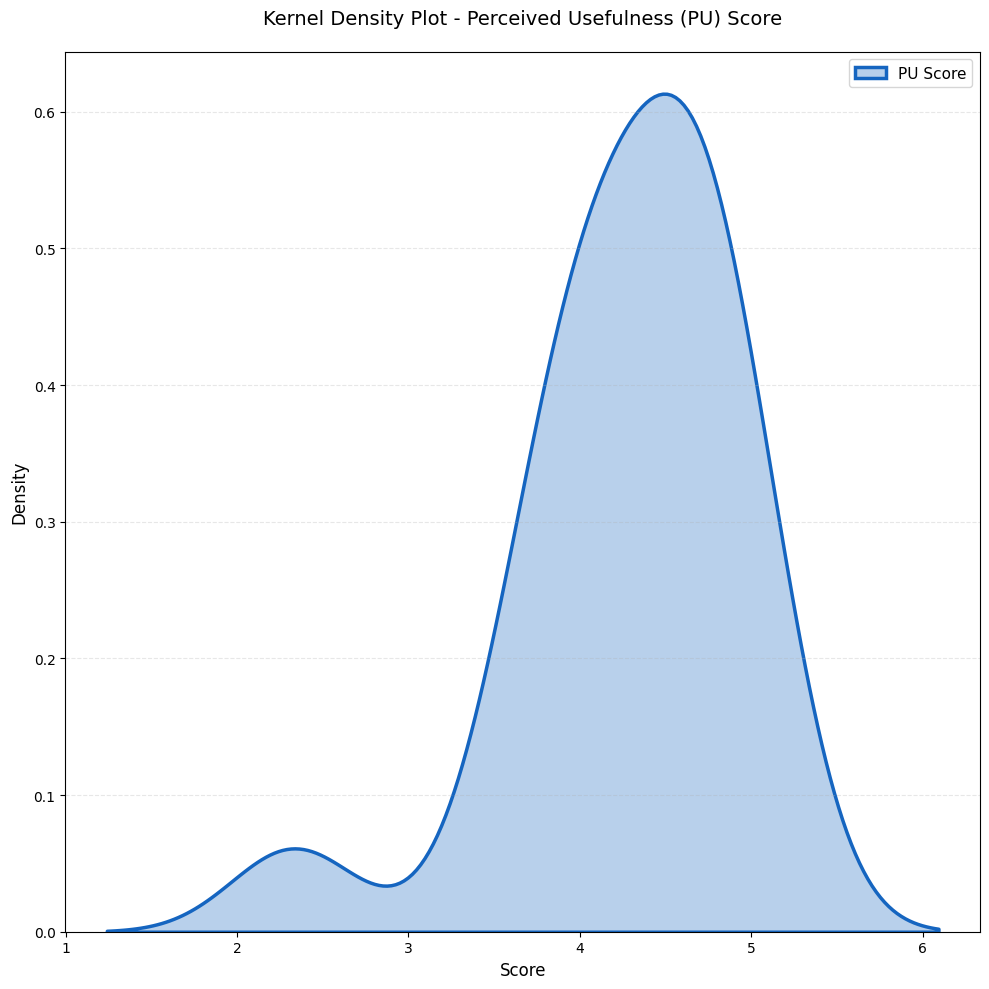

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

PU_columns = ["PU_score"]

plt.figure(figsize=(10, 10))

# Colori distinti per ogni distribuzione
colors = ['#1565C0']
labels = ['PU Score']

# Crea le curve kernel density sovrapposte
for col, color, label in zip(PU_columns, colors, labels):
    sns.kdeplot(data=rq_2_df[col].dropna(), 
                color=color, 
                linewidth=2.5, 
                label=label,
                fill=True,
                alpha=0.3)

plt.xlabel("Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Kernel Density Plot - Perceived Usefulness (PU) Score", fontsize=14, pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/pu_kernel_density.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=1200,
            facecolor='white',
            edgecolor='none')

plt.show()

Shapiro-Wilk test: statistic=0.8511606936491988, p-value=0.008833718807533798
I dati si discostano dalla normalità.


<Figure size 1000x1000 with 0 Axes>

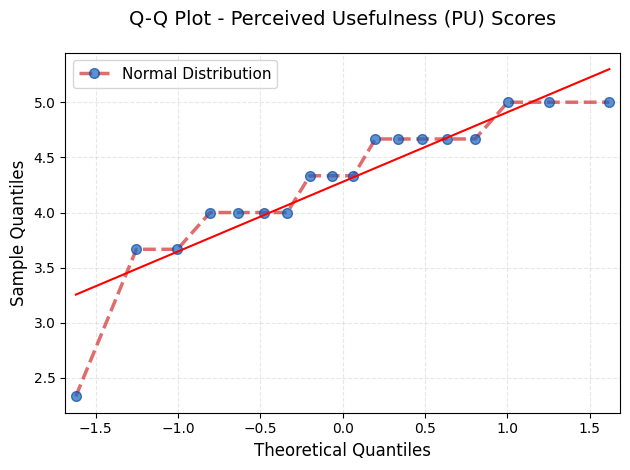

In [330]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

pu_scores = rq_2_df["PU_score"]


shapiro_stat, shapiro_p = stats.shapiro(pu_scores)
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("I dati si discostano dalla normalità.")


import statsmodels.api as sm
plt.figure(figsize=(10, 10))

# Crea il QQ-plot base
sm.qqplot(pu_scores, 
          line='s',
          marker='o',
          markerfacecolor='#1565C0',
          markeredgecolor='#0D47A1',
          alpha=0.7,
          markersize=7)

# Personalizza il plot
plt.title("Q-Q Plot - Perceived Usefulness (PU) Scores", fontsize=14, pad=20)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

# Migliora la linea di riferimento
ax = plt.gca()
lines = ax.get_lines()
if len(lines) > 0:
    line = lines[0]
    line.set_color('#D32F2F')
    line.set_linewidth(2.5)
    line.set_linestyle('--')
    line.set_label('Normal Distribution')

plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/qqplot_pu_scores.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=1200,
            facecolor='white',
            edgecolor='none')

plt.show()


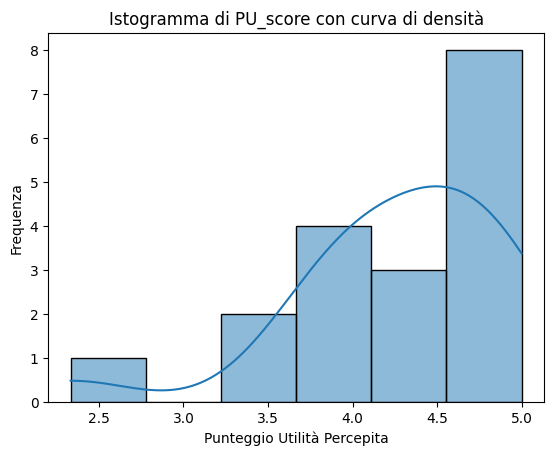

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(pu_scores.to_list(), kde=True)
plt.title("Istogramma di PU_score con curva di densità")
plt.xlabel("Punteggio Utilità Percepita")
plt.ylabel("Frequenza")
plt.show()

### Non avendo distribuzione normale dei dati, non posso usare t-test, quindi sto usando wilcoxon.

In [332]:
stat, p = stats.wilcoxon(pu_scores - 3)

print(f"Wilcoxon test statistic={stat}, p-value={p}")
if p < 0.05: # type: ignore
    print("Rifiuto H0: la mediana è significativamente diversa da 2.5")
else:
    print("Non rifiuto H0: la mediana non è significativamente diversa da 2.5")

Wilcoxon test statistic=2.0, p-value=0.0002574871798673143
Rifiuto H0: la mediana è significativamente diversa da 2.5


### PE score

In [333]:
PE_columns = ["TAM_PE_1", "TAM_PE_2", "TAM_PE_3", "TAM_PE_4"]
rq_2_df["PE_score"] = rq_2_df[PE_columns].mean(axis=1)
rq_2_df["PE_score"].describe()
print(rq_2_df["PE_score"].describe().to_dict())

{'count': 18.0, 'mean': 4.333333333333333, 'std': 0.6697233845138647, 'min': 3.0, '25%': 3.8125, '50%': 4.5, '75%': 5.0, 'max': 5.0}


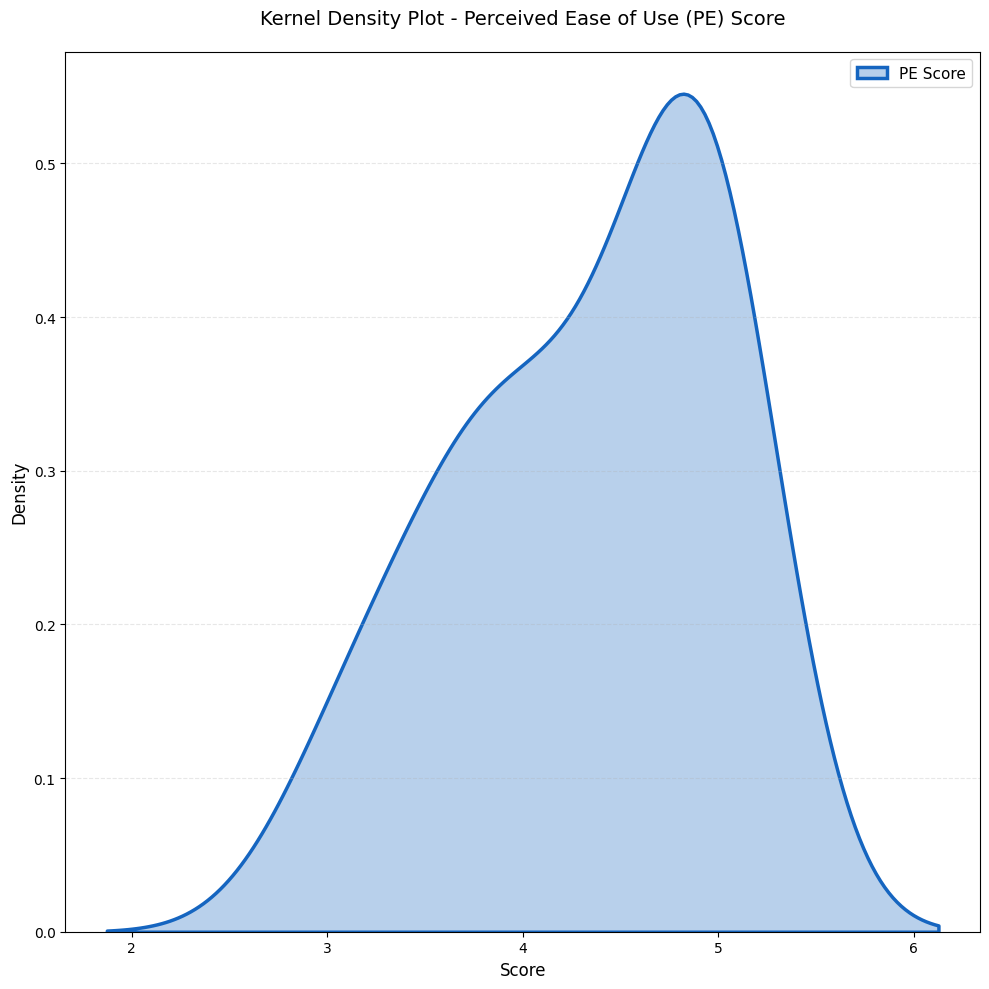

In [334]:
plt.figure(figsize=(10, 10))
# Crea la curva kernel density
sns.kdeplot(data=rq_2_df["PE_score"].dropna(), 
            color='#1565C0', 
            linewidth=2.5, 
            label='PE Score',
            fill=True,
            alpha=0.3)

plt.xlabel("Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Kernel Density Plot - Perceived Ease of Use (PE) Score", fontsize=14, pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/pe_kernel_density.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

<Figure size 1000x1000 with 0 Axes>

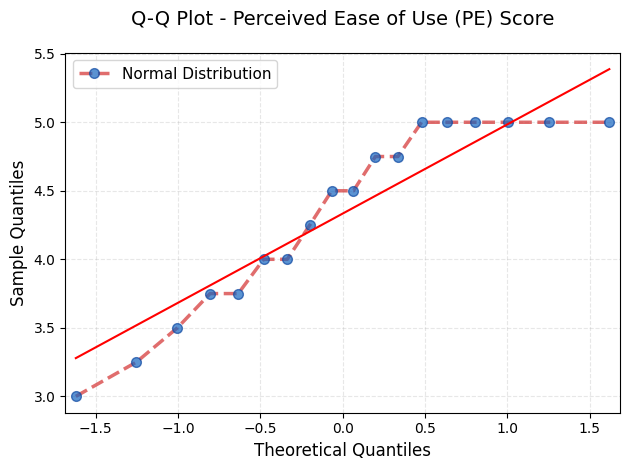

In [335]:
plt.figure(figsize=(10, 10))

# Crea il QQ-plot
sm.qqplot(rq_2_df["PE_score"].dropna(), 
          line='s',
          marker='o',
          markerfacecolor='#1565C0',
          markeredgecolor='#0D47A1',
          alpha=0.7,
          markersize=7)

# Personalizza il plot
plt.title("Q-Q Plot - Perceived Ease of Use (PE) Score", fontsize=14, pad=20)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

# Migliora la linea di riferimento
ax = plt.gca()
lines = ax.get_lines()
if len(lines) > 0:
    line = lines[0]
    line.set_color('#D32F2F')
    line.set_linewidth(2.5)
    line.set_linestyle('--')
    line.set_label('Normal Distribution')

plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/qqplot_pe_score.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

In [336]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["PE_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("✅ I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.8786518798214216, p-value=0.024777815041874218
Distribuzione non normale


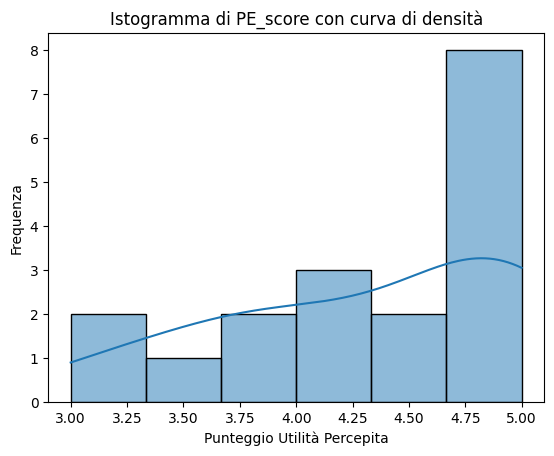

In [337]:
sns.histplot(rq_2_df["PE_score"].to_list(), kde=True)
plt.title("Istogramma di PE_score con curva di densità")
plt.xlabel("Punteggio Utilità Percepita")
plt.ylabel("Frequenza")
plt.show()

In [338]:
stat, p = stats.wilcoxon(rq_2_df["PE_score"] - 3)

print(f"Wilcoxon test statistic={stat}, p-value={p}")
if p < 0.05: # type: ignore
    print("Rifiuto H0: la mediana è significativamente diversa da 3")
else:
    print("Non rifiuto H0: la mediana non è significativamente diversa da 3")

Wilcoxon test statistic=0.0, p-value=0.00027125501835978123
Rifiuto H0: la mediana è significativamente diversa da 3


### ATU

In [339]:
ATU_columns = ["TAM_ATU_1", "TAM_ATU_2", "TAM_ATU_3"]
rq_2_df["ATU_score"] = rq_2_df[ATU_columns].mean(axis=1)
print(rq_2_df["ATU_score"].describe().to_dict())
rq_2_df["ATU_score"].describe()

{'count': 18.0, 'mean': 4.185185185185185, 'std': 0.6975421108212163, 'min': 2.3333333333333335, '25%': 3.75, '50%': 4.333333333333333, '75%': 4.666666666666667, 'max': 5.0}


count    18.000000
mean      4.185185
std       0.697542
min       2.333333
25%       3.750000
50%       4.333333
75%       4.666667
max       5.000000
Name: ATU_score, dtype: float64

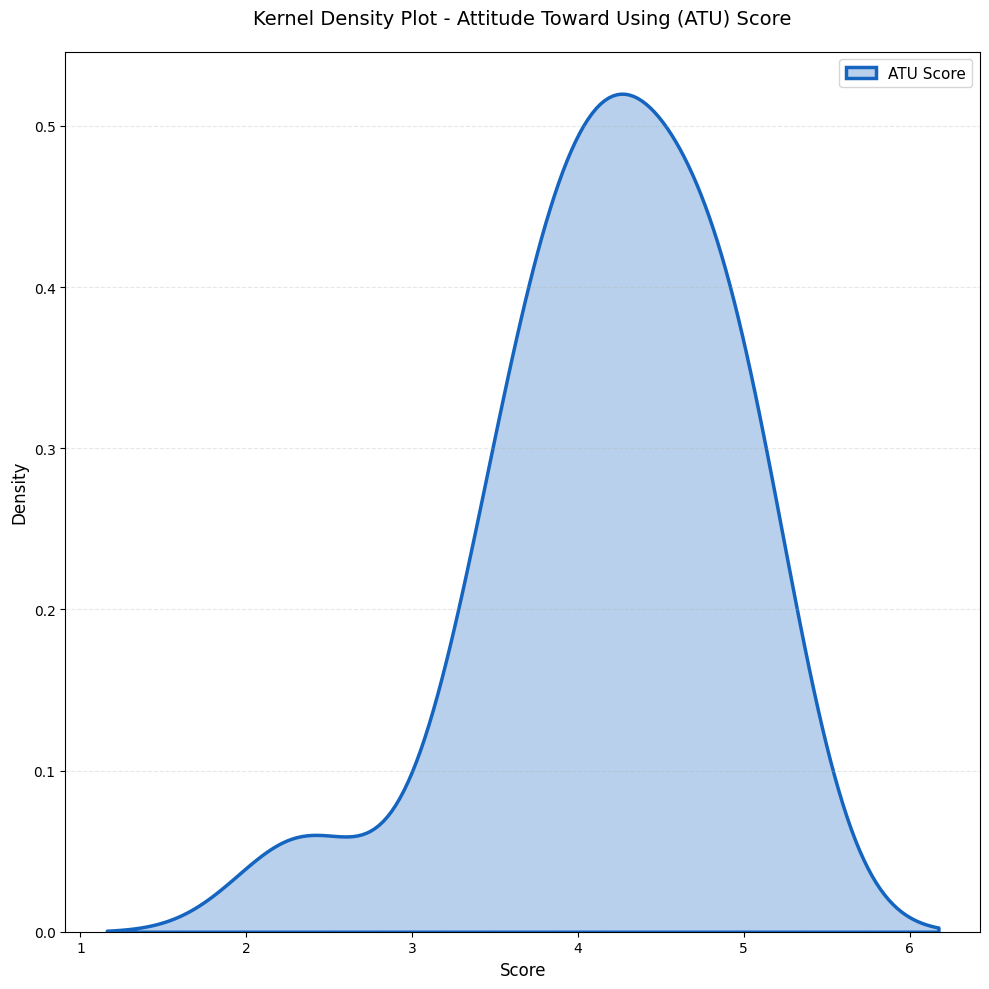

In [340]:
plt.figure(figsize=(10, 10))

# Crea la curva kernel density
sns.kdeplot(data=rq_2_df["ATU_score"].dropna(), 
            color='#1565C0', 
            linewidth=2.5, 
            label='ATU Score',
            fill=True,
            alpha=0.3)

plt.xlabel("Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Kernel Density Plot - Attitude Toward Using (ATU) Score", fontsize=14, pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/atu_kernel_density.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

<Figure size 1000x1000 with 0 Axes>

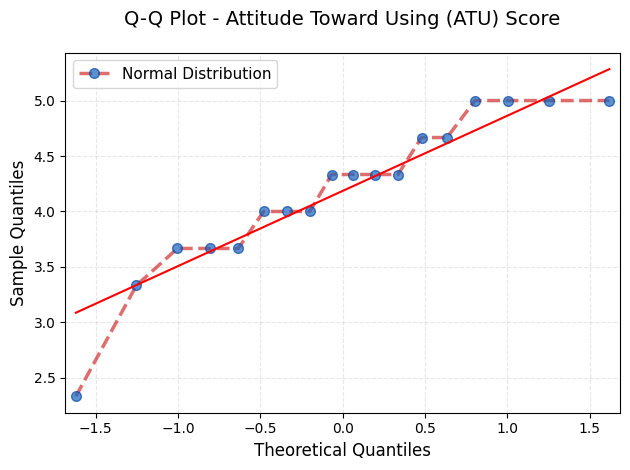

In [341]:
plt.figure(figsize=(10, 10))

# Crea il QQ-plot
sm.qqplot(rq_2_df["ATU_score"].dropna(), 
          line='s',
          marker='o',
          markerfacecolor='#1565C0',
          markeredgecolor='#0D47A1',
          alpha=0.7,
          markersize=7)

# Personalizza il plot
plt.title("Q-Q Plot - Attitude Toward Using (ATU) Score", fontsize=14, pad=20)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

# Migliora la linea di riferimento
ax = plt.gca()
lines = ax.get_lines()
if len(lines) > 0:
    line = lines[0]
    line.set_color('#D32F2F')
    line.set_linewidth(2.5)
    line.set_linestyle('--')
    line.set_label('Normal Distribution')

plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/qqplot_atu_score.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

In [342]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["ATU_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.9066352493283838, p-value=0.07506676794670067
I dati non si discostano significativamente dalla normalità.


In [343]:
t_statistic, p_value = stats.ttest_1samp(rq_2_df["ATU_score"], 3)
t_statistic, p_value

(np.float64(7.208618390820643), np.float64(1.4625042406164728e-06))

### Mental Demand

In [344]:
MD_columns = ["TLX_MD_1", "TLX_MD_2", "TLX_MD_3"]
rq_2_df["MD_score"] = rq_2_df[MD_columns].mean(axis=1)
print("MD_score")
print(rq_2_df["MD_score"].describe().to_dict())
rq_2_df["MD_score"].describe()

MD_score
{'count': 18.0, 'mean': 3.6481481481481475, 'std': 1.5528688282260377, 'min': 1.0, '25%': 2.75, '50%': 3.5, '75%': 4.25, 'max': 7.333333333333333}


count    18.000000
mean      3.648148
std       1.552869
min       1.000000
25%       2.750000
50%       3.500000
75%       4.250000
max       7.333333
Name: MD_score, dtype: float64

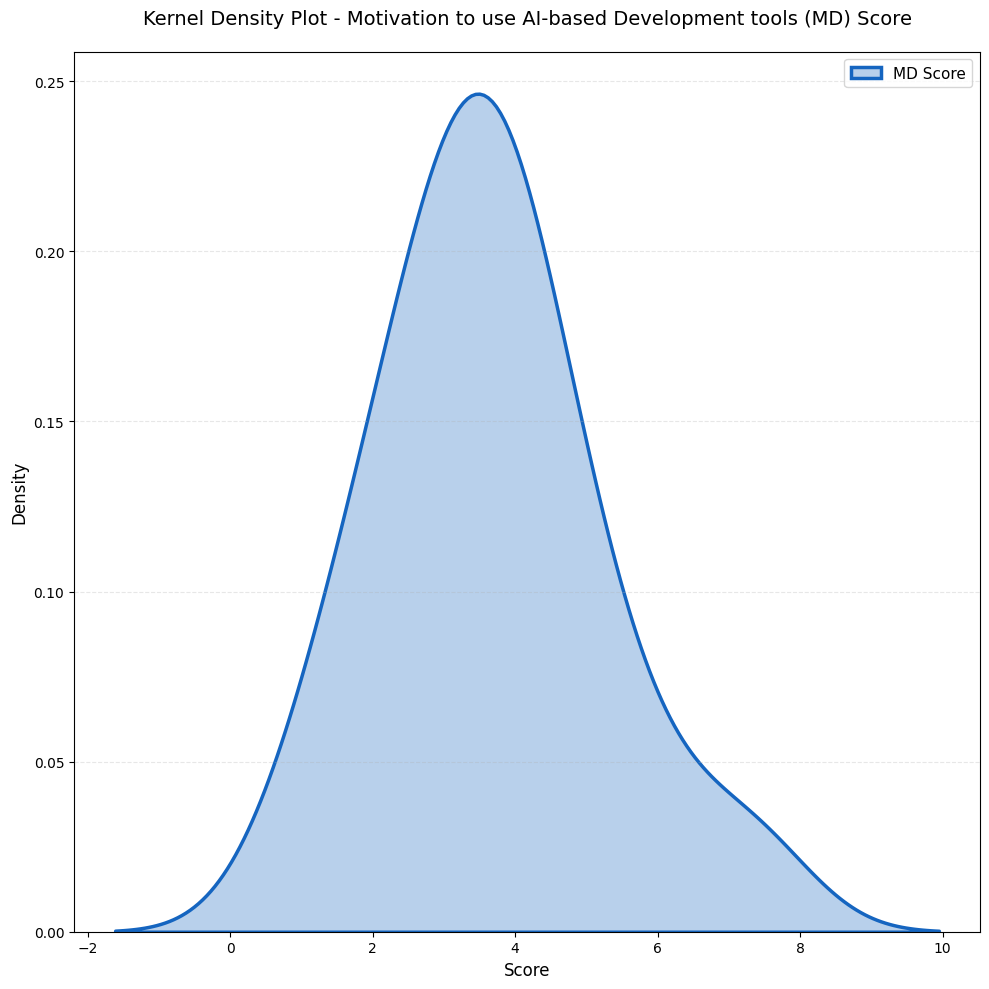

In [345]:
plt.figure(figsize=(10, 10))

# Crea la curva kernel density
sns.kdeplot(data=rq_2_df["MD_score"].dropna(), 
            color='#1565C0', 
            linewidth=2.5, 
            label='MD Score',
            fill=True,
            alpha=0.3)

plt.xlabel("Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Kernel Density Plot - Motivation to use AI-based Development tools (MD) Score", fontsize=14, pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/md_kernel_density.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

<Figure size 1000x1000 with 0 Axes>

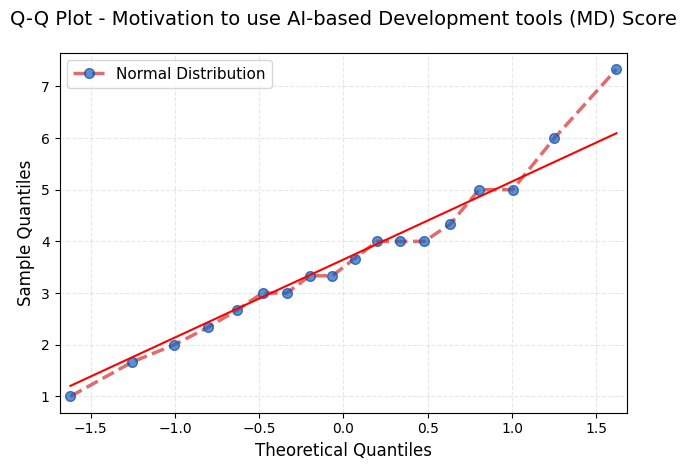

In [346]:
plt.figure(figsize=(10, 10))

# Crea il QQ-plot
sm.qqplot(rq_2_df["MD_score"].dropna(), 
          line='s',
          marker='o',
          markerfacecolor='#1565C0',
          markeredgecolor='#0D47A1',
          alpha=0.7,
          markersize=7)

# Personalizza il plot
plt.title("Q-Q Plot - Motivation to use AI-based Development tools (MD) Score", fontsize=14, pad=20)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

# Migliora la linea di riferimento
ax = plt.gca()
lines = ax.get_lines()
if len(lines) > 0:
    line = lines[0]
    line.set_color('#D32F2F')
    line.set_linewidth(2.5)
    line.set_linestyle('--')
    line.set_label('Normal Distribution')

plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/qqplot_md_score.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

In [347]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["MD_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.9733348338814227, p-value=0.8575243847912033
I dati non si discostano significativamente dalla normalità.


In [348]:
t_statistic, p_value = stats.ttest_1samp(rq_2_df["MD_score"], 5)
t_statistic, p_value 

(np.float64(-3.6934360232964676), np.float64(0.0018033542208013567))

### Frustrazione

In [349]:
F_columns = ["TLX_F_1", "TLX_F_2"]
rq_2_df["F_score"] = rq_2_df[F_columns].mean(axis=1)
print("Frustration (F)")
print(rq_2_df["F_score"].describe().to_dict())
rq_2_df["F_score"].describe()

Frustration (F)
{'count': 18.0, 'mean': 3.861111111111111, 'std': 1.6432173924021163, 'min': 1.0, '25%': 3.0, '50%': 4.0, '75%': 4.375, 'max': 7.5}


count    18.000000
mean      3.861111
std       1.643217
min       1.000000
25%       3.000000
50%       4.000000
75%       4.375000
max       7.500000
Name: F_score, dtype: float64

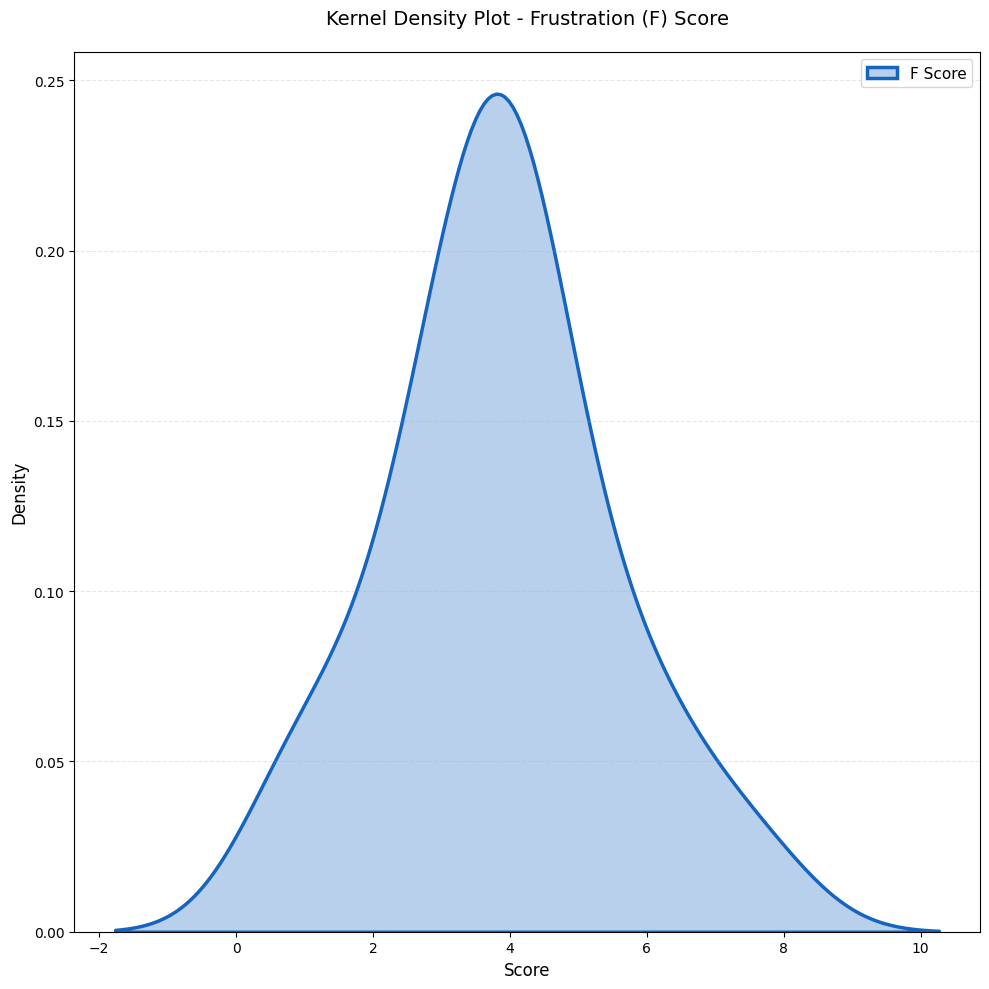

In [350]:
plt.figure(figsize=(10, 10))

# Crea la curva kernel density
sns.kdeplot(data=rq_2_df["F_score"].dropna(), 
            color='#1565C0', 
            linewidth=2.5, 
            label='F Score',
            fill=True,
            alpha=0.3)

plt.xlabel("Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Kernel Density Plot - Frustration (F) Score", fontsize=14, pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/f_kernel_density.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

<Figure size 1000x1000 with 0 Axes>

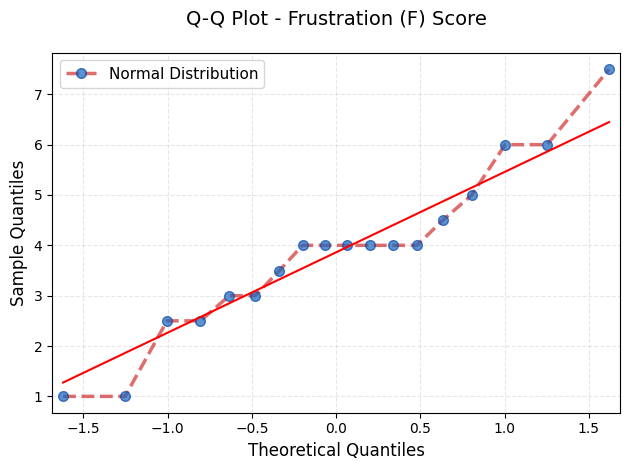

In [351]:
plt.figure(figsize=(10, 10))

# Crea il QQ-plot
sm.qqplot(rq_2_df["F_score"].dropna(), 
          line='s',
          marker='o',
          markerfacecolor='#1565C0',
          markeredgecolor='#0D47A1',
          alpha=0.7,
          markersize=7)

# Personalizza il plot
plt.title("Q-Q Plot - Frustration (F) Score", fontsize=14, pad=20)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

# Migliora la linea di riferimento
ax = plt.gca()
lines = ax.get_lines()
if len(lines) > 0:
    line = lines[0]
    line.set_color('#D32F2F')
    line.set_linewidth(2.5)
    line.set_linestyle('--')
    line.set_label('Normal Distribution')

plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/qqplot_f_score.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

In [352]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["F_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.9494870730169522, p-value=0.4170270600525932
I dati non si discostano significativamente dalla normalità.


In [353]:
t_statistic, p_value = stats.ttest_1samp(rq_2_df["F_score"], 5)
t_statistic, p_value, p_value < 0.05

(np.float64(-2.9405094909838003), np.float64(0.009141958119891581), np.True_)

### Feedbacks

In [354]:
FB_columns = ["FB_1", "FB_2"]
rq_2_df["FB_score"] = rq_2_df[FB_columns].mean(axis=1)

print("user feedback score")
print(rq_2_df["FB_score"].describe().to_dict())

rq_2_df["FB_score"].describe()

user feedback score
{'count': 18.0, 'mean': 1.8333333333333333, 'std': 0.9999999999999999, 'min': 0.5, '25%': 1.0, '50%': 2.0, '75%': 2.0, 'max': 4.0}


count    18.000000
mean      1.833333
std       1.000000
min       0.500000
25%       1.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: FB_score, dtype: float64

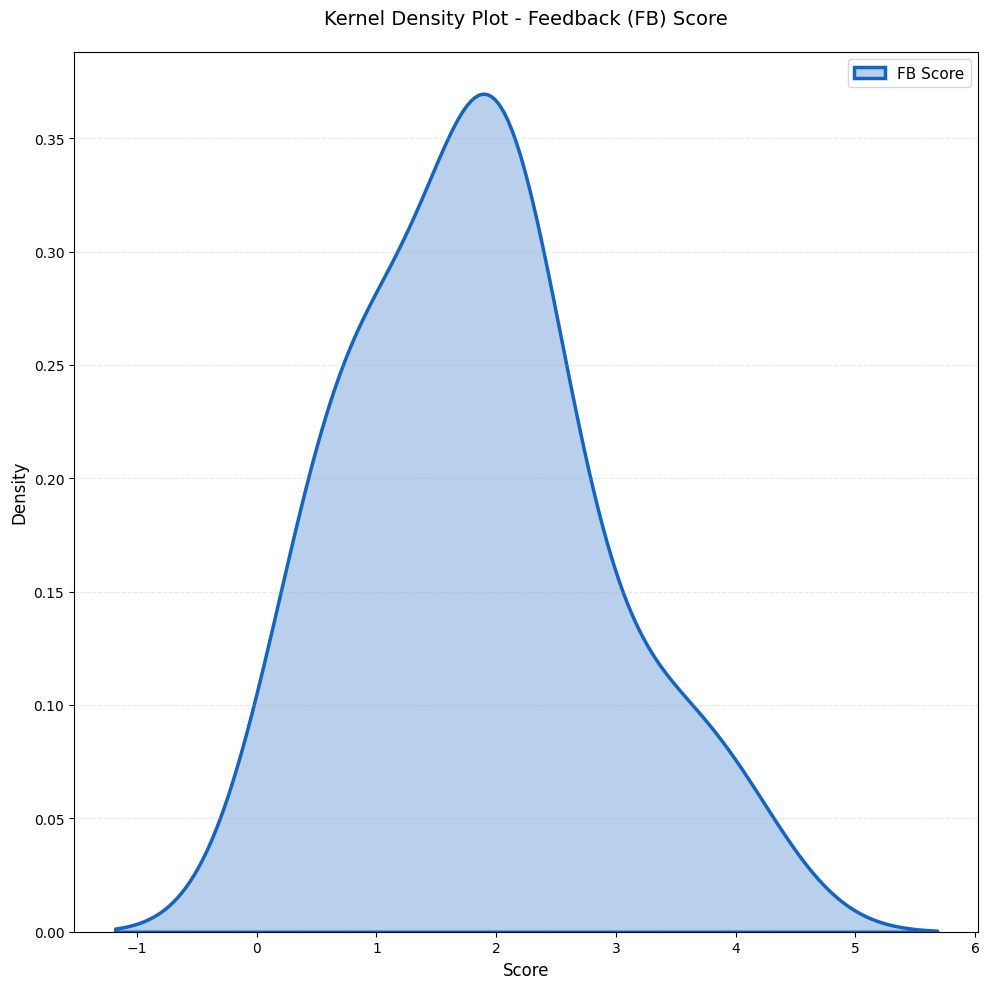

In [355]:
plt.figure(figsize=(10, 10))

# Crea la curva kernel density
sns.kdeplot(data=rq_2_df["FB_score"].dropna(), 
            color='#1565C0', 
            linewidth=2.5, 
            label='FB Score',
            fill=True,
            alpha=0.3)

plt.xlabel("Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Kernel Density Plot - Feedback (FB) Score", fontsize=14, pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/fb_kernel_density.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

<Figure size 1000x1000 with 0 Axes>

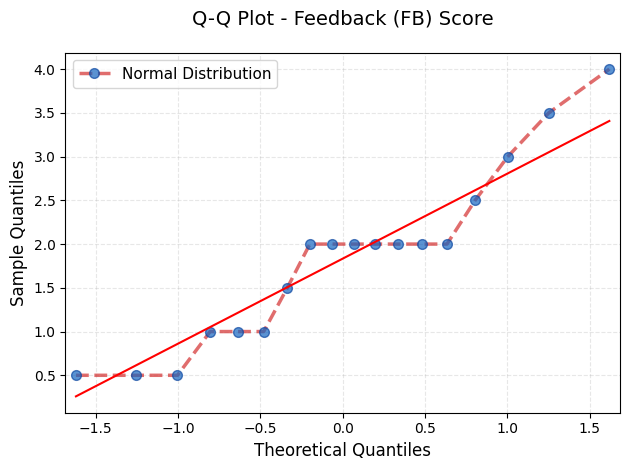

In [356]:
plt.figure(figsize=(10, 10))

# Crea il QQ-plot
sm.qqplot(rq_2_df["FB_score"].dropna(), 
          line='s',
          marker='o',
          markerfacecolor='#1565C0',
          markeredgecolor='#0D47A1',
          alpha=0.7,
          markersize=7)

# Personalizza il plot
plt.title("Q-Q Plot - Feedback (FB) Score", fontsize=14, pad=20)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

# Migliora la linea di riferimento
ax = plt.gca()
lines = ax.get_lines()
if len(lines) > 0:
    line = lines[0]
    line.set_color('#D32F2F')
    line.set_linewidth(2.5)
    line.set_linestyle('--')
    line.set_label('Normal Distribution')

plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/qqplot_fb_score.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

In [357]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["FB_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.9169013476437811, p-value=0.1139275953907482
I dati non si discostano significativamente dalla normalità.


In [358]:
t_statistic, p_value = stats.ttest_1samp(rq_2_df["FB_score"], 5)
t_statistic, p_value 

(np.float64(-13.435028842544407), np.float64(1.7548637173879547e-10))

### Performance (P)

In [359]:
FB_columns = ["TLX_P_1"]
rq_2_df["P_score"] = rq_2_df[FB_columns].mean(axis=1)
print("performance score")
print(rq_2_df["P_score"].describe().to_dict())
rq_2_df["P_score"].describe()

performance score
{'count': 18.0, 'mean': 7.5, 'std': 1.5048939771136507, 'min': 3.0, '25%': 7.0, '50%': 8.0, '75%': 8.0, 'max': 10.0}


count    18.000000
mean      7.500000
std       1.504894
min       3.000000
25%       7.000000
50%       8.000000
75%       8.000000
max      10.000000
Name: P_score, dtype: float64

In [360]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["P_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.8515433401958032, p-value=0.008957683552629029
Distribuzione non normale


In [361]:
stat, p = stats.wilcoxon(rq_2_df["P_score"] - 5)

print(f"Wilcoxon test statistic={stat}, p-value={p}")
if p < 0.05: # type: ignore
    print("Rifiuto H0: la mediana è significativamente diversa da 5")
else:
    print("Non rifiuto H0: la mediana non è significativamente diversa da 5")

Wilcoxon test statistic=5.0, p-value=0.0003842040265273922
Rifiuto H0: la mediana è significativamente diversa da 5


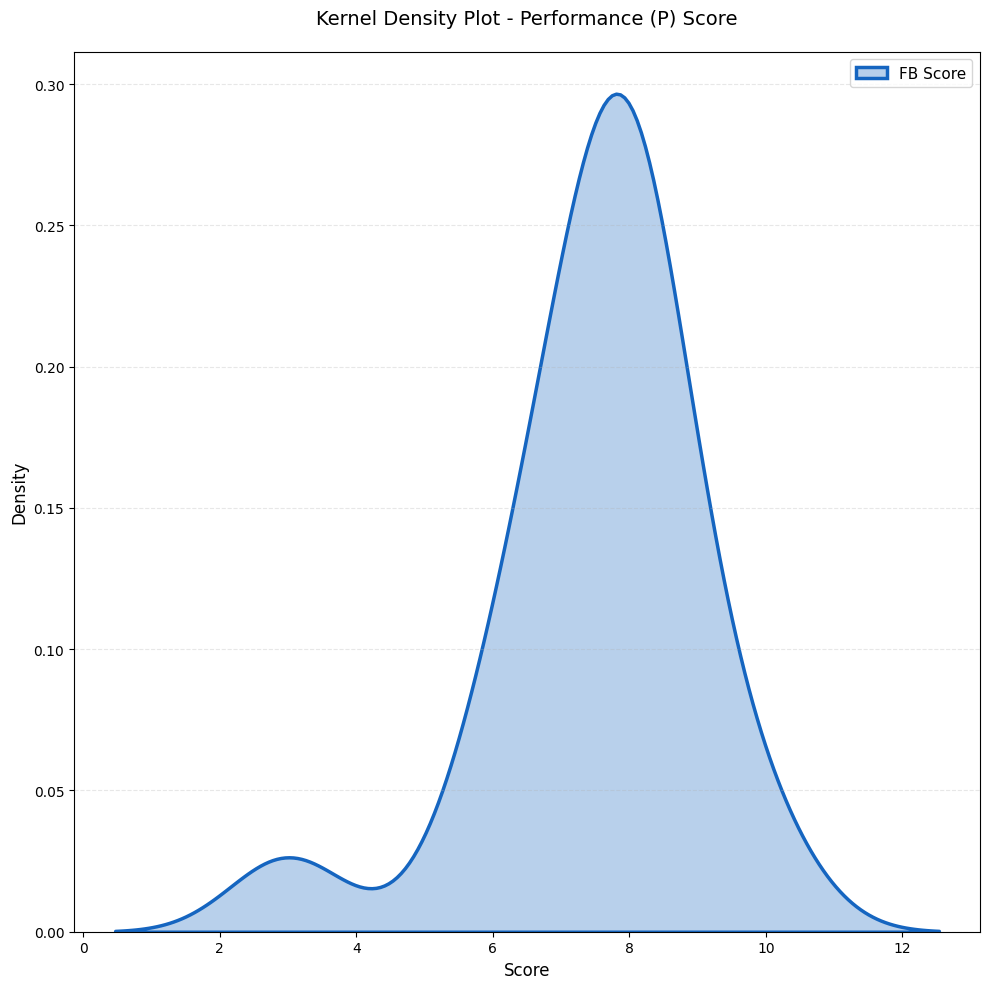

In [362]:
plt.figure(figsize=(10, 10))

# Crea la curva kernel density
sns.kdeplot(data=rq_2_df["P_score"].dropna(), 
            color='#1565C0', 
            linewidth=2.5, 
            label='FB Score',
            fill=True,
            alpha=0.3)

plt.xlabel("Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Kernel Density Plot - Performance (P) Score", fontsize=14, pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/P_kernel_density.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

<Figure size 1000x1000 with 0 Axes>

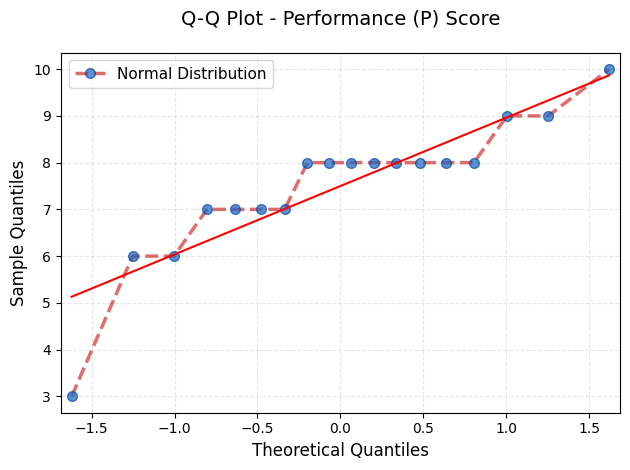

In [363]:
plt.figure(figsize=(10, 10))

# Crea il QQ-plot
sm.qqplot(rq_2_df["P_score"].dropna(), 
          line='s',
          marker='o',
          markerfacecolor='#1565C0',
          markeredgecolor='#0D47A1',
          alpha=0.7,
          markersize=7)

# Personalizza il plot
plt.title("Q-Q Plot - Performance (P) Score", fontsize=14, pad=20)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

# Migliora la linea di riferimento
ax = plt.gca()
lines = ax.get_lines()
if len(lines) > 0:
    line = lines[0]
    line.set_color('#D32F2F')
    line.set_linewidth(2.5)
    line.set_linestyle('--')
    line.set_label('Normal Distribution')

plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/qqplot_p_score.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

### BI Score

In [364]:
BI_columns = ["TAM_BI_1"]

In [365]:
rq_2_df["BI_score"] = rq_2_df[BI_columns].mean(axis=1)
print("BI score")
print(rq_2_df["BI_score"].describe().to_dict())
rq_2_df["BI_score"].describe()

BI score
{'count': 18.0, 'mean': 4.611111111111111, 'std': 0.6076849889141857, 'min': 3.0, '25%': 4.0, '50%': 5.0, '75%': 5.0, 'max': 5.0}


count    18.000000
mean      4.611111
std       0.607685
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: BI_score, dtype: float64

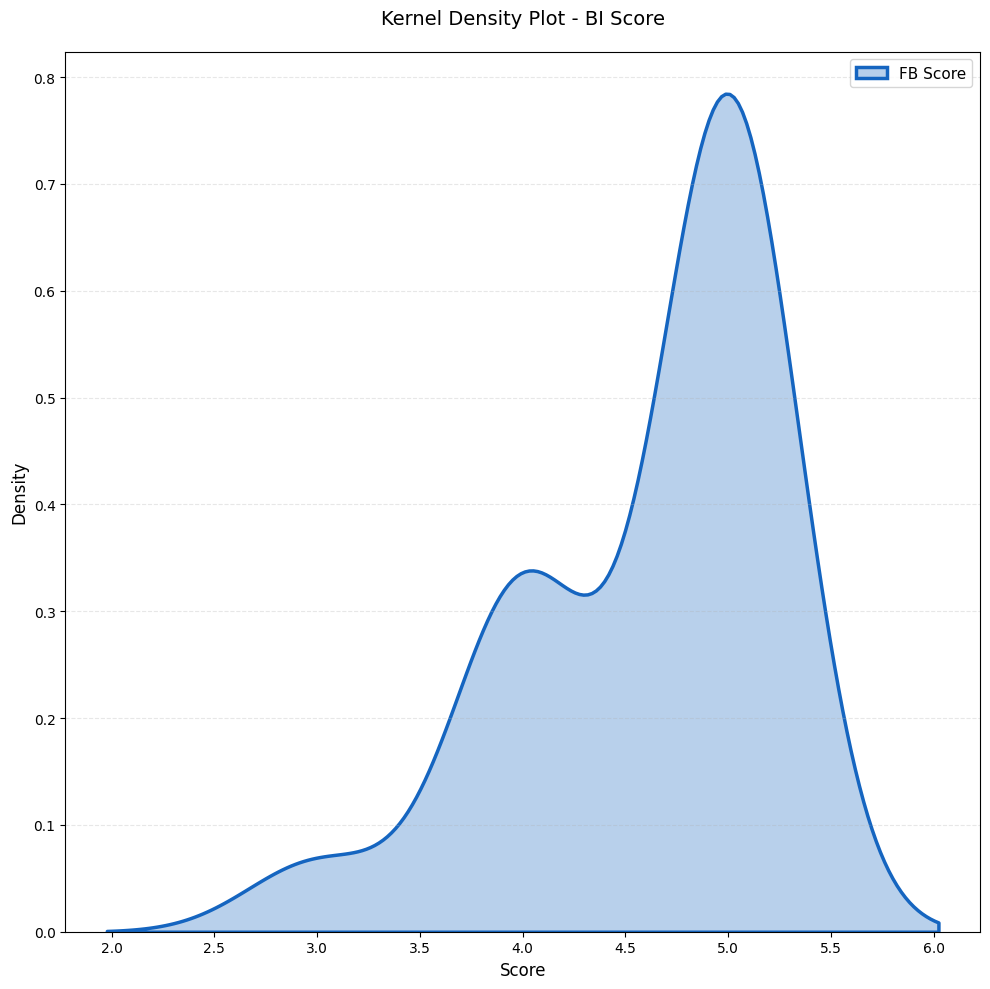

In [366]:
plt.figure(figsize=(10, 10))

# Crea la curva kernel density
sns.kdeplot(data=rq_2_df["BI_score"].dropna(), 
            color='#1565C0', 
            linewidth=2.5, 
            label='FB Score',
            fill=True,
            alpha=0.3)

plt.xlabel("Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Kernel Density Plot - BI Score", fontsize=14, pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/BI_kernel_density.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

<Figure size 1000x1000 with 0 Axes>

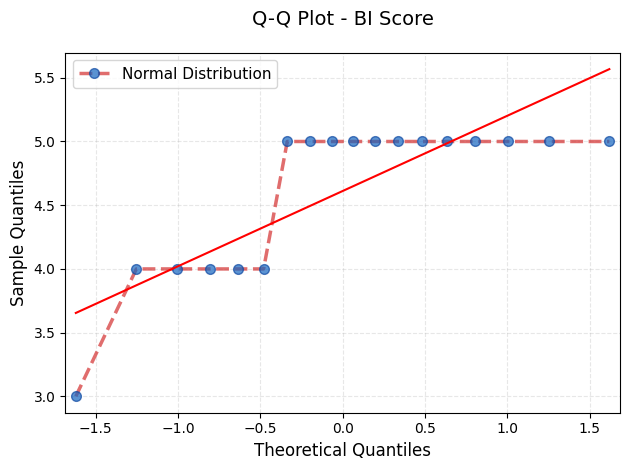

In [367]:
plt.figure(figsize=(10, 10))

# Crea il QQ-plot
sm.qqplot(rq_2_df["BI_score"].dropna(), 
          line='s',
          marker='o',
          markerfacecolor='#1565C0',
          markeredgecolor='#0D47A1',
          alpha=0.7,
          markersize=7)

# Personalizza il plot
plt.title("Q-Q Plot - BI Score", fontsize=14, pad=20)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

# Migliora la linea di riferimento
ax = plt.gca()
lines = ax.get_lines()
if len(lines) > 0:
    line = lines[0]
    line.set_color('#D32F2F')
    line.set_linewidth(2.5)
    line.set_linestyle('--')
    line.set_label('Normal Distribution')

plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/qqplot_bi_score.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

In [368]:
shapiro_stat, shapiro_p = stats.shapiro(rq_2_df["BI_score"])
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("Distribuzione non normale")

Shapiro-Wilk test: statistic=0.6620491234996805, p-value=2.986209576156882e-05
Distribuzione non normale


In [369]:
stat, p = stats.wilcoxon(rq_2_df["BI_score"] - 3)

print(f"Wilcoxon test statistic={stat}, p-value={p}")
if p < 0.05: # type: ignore
    print("Rifiuto H0: la mediana è significativamente diversa da 3")
else:
    print("Non rifiuto H0: la mediana non è significativamente diversa da 3")

Wilcoxon test statistic=0.0, p-value=0.0001522843880961441
Rifiuto H0: la mediana è significativamente diversa da 3


### Effort

In [370]:
EFFORT_columns = ["TLX_E_1", "TLX_E_2", "TLX_E_3"]
rq_2_df["EFFORT_score"] = rq_2_df[EFFORT_columns].mean(axis=1)
print("effort")
print(rq_2_df["EFFORT_score"].describe().to_dict())
rq_2_df["EFFORT_score"].describe()


effort
{'count': 18.0, 'mean': 3.018518518518518, 'std': 1.4210013141904585, 'min': 1.3333333333333333, '25%': 1.6666666666666667, '50%': 3.0, '75%': 4.166666666666666, 'max': 5.666666666666667}


count    18.000000
mean      3.018519
std       1.421001
min       1.333333
25%       1.666667
50%       3.000000
75%       4.166667
max       5.666667
Name: EFFORT_score, dtype: float64

In [371]:
effort_scores = rq_2_df["EFFORT_score"]


shapiro_stat, shapiro_p = stats.shapiro(effort_scores)
print(f"Shapiro-Wilk test: statistic={shapiro_stat}, p-value={shapiro_p}")
if shapiro_p > 0.05:
    print("I dati non si discostano significativamente dalla normalità.")
else:
    print("I dati si discostano dalla normalità.")

Shapiro-Wilk test: statistic=0.9017296122514447, p-value=0.06159029103188102
I dati non si discostano significativamente dalla normalità.


In [372]:
t_statistic, p_value = stats.ttest_1samp(effort_scores, 5)
t_statistic, p_value 

(np.float64(-5.916049387256213), np.float64(1.6927135284120616e-05))

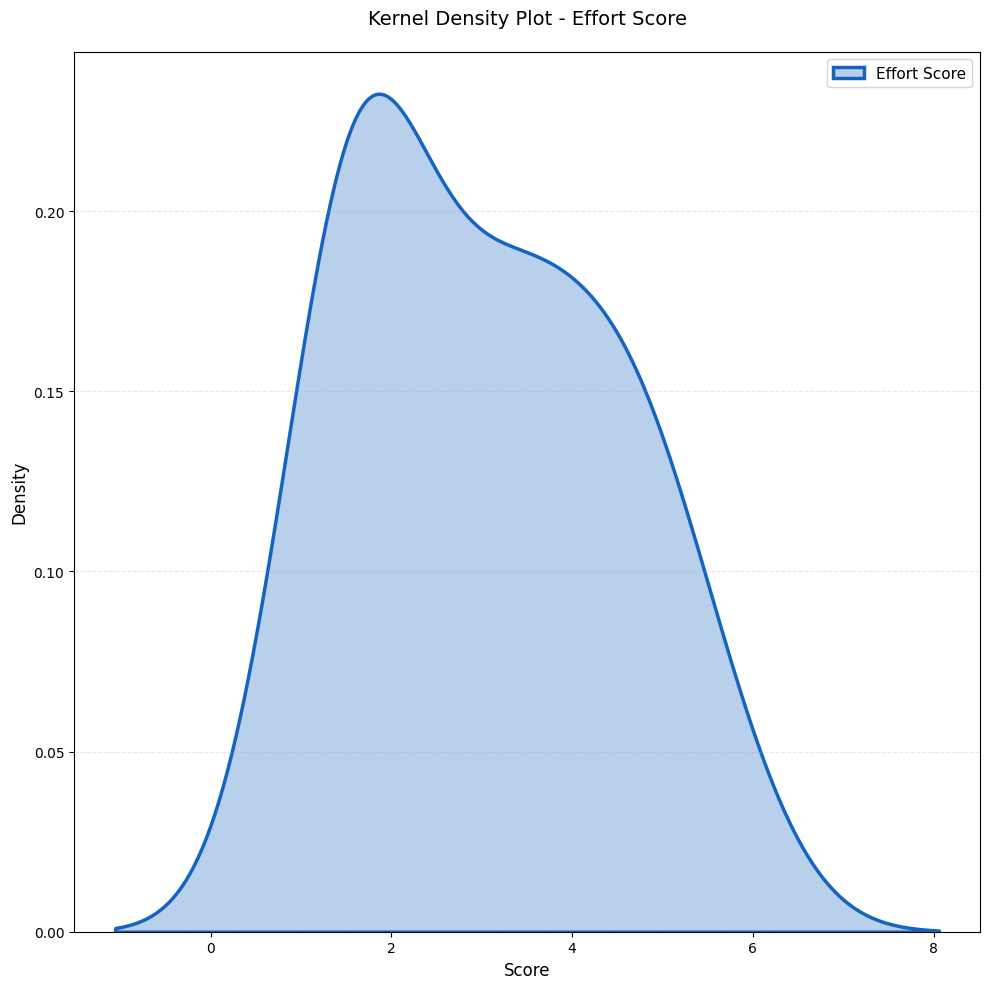

In [373]:
plt.figure(figsize=(10, 10))

# Crea la curva kernel density
sns.kdeplot(data=rq_2_df["EFFORT_score"].dropna(), 
            color='#1565C0', 
            linewidth=2.5, 
            label='Effort Score',
            fill=True,
            alpha=0.3)

plt.xlabel("Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Kernel Density Plot - Effort Score", fontsize=14, pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/EFFORT_kernel_density.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

<Figure size 1000x1000 with 0 Axes>

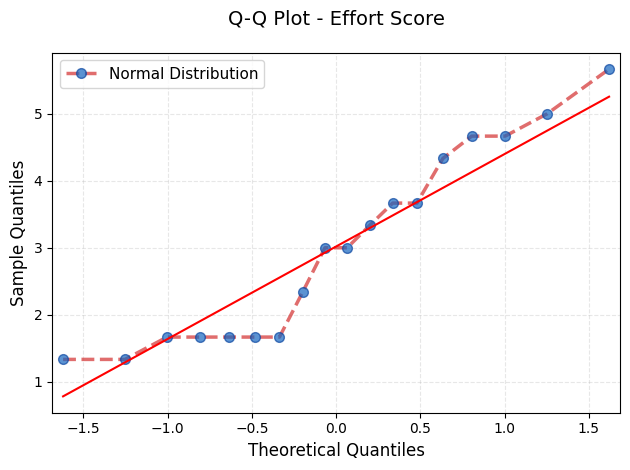

In [374]:
plt.figure(figsize=(10, 10))

# Crea il QQ-plot
sm.qqplot(rq_2_df["EFFORT_score"].dropna(), 
          line='s',
          marker='o',
          markerfacecolor='#1565C0',
          markeredgecolor='#0D47A1',
          alpha=0.7,
          markersize=7)

# Personalizza il plot
plt.title("Q-Q Plot - Effort Score", fontsize=14, pad=20)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

# Migliora la linea di riferimento
ax = plt.gca()
lines = ax.get_lines()
if len(lines) > 0:
    line = lines[0]
    line.set_color('#D32F2F')
    line.set_linewidth(2.5)
    line.set_linestyle('--')
    line.set_label('Normal Distribution')

plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()

# Salva in PDF ad alta qualità
plt.savefig("../figures/qqplot_effort_score.pdf", 
            format='pdf', 
            bbox_inches='tight',
            dpi=300,
            facecolor='white',
            edgecolor='none')

plt.show()

### Count the preferences

In [375]:
rq_2_df["FB_3"].value_counts()

FB_3
TARS             16
No Preference     2
Name: count, dtype: int64

### Qualitative Analysis - Feedback testuale

In [384]:
" - \n".join(df["General feedback about the tool"].map(str).to_list())

'Il tool risulta ben integrato all\'interno di VSCode, in generale è molto semplice sia da installare che da utilizzare. Le spiegazioni fornite son ben esaustive. - \nIl tool l\'ho trovato semplice da utilizzare, nonostante i piccoli problemi di percorso riscontrati. Le spiegazioni date dal tool le ho trovate, per quanto molto semplici e a tratti confusionarie a causa di errori di punteggiatura o piccoli errorini di formazione della frase, molto esplicative e in generale buone per poter poter capire piccoli frammenti. Magari il fatto che tra una spiegazione di un frammento e quelli prima o dopo, il tool non si ricolleghi tra i suggerimenti e le spiegazioni non facilità la possibilità di creare mentalmente un filo logico del codice. - \nIl tool è molto utile per rendere la comprensione del codice molto più semplice e rapida. Qualcosa da rivedere sull\'usabilità e la UI in generale, ma ha tanto potenziale e sono cose su cui si può tranquillamente lavorare. Forse rivedere anche qualcosina